   **Сборный проект"Выявление закономерностей,определяющие успешность игр, для интернет-магазина «Стримчик»"**
   
**Цель исследования**
1) Определить сколько игр выпускалось в разные годы, как менялись продажи

2) Определить актуальный период, данные которого помогут построить прогноз на 2017 год.

3) Выявление закономерностей,определяющие успешность игр, для интернет-магазина

4) Определить потенциально популярный продукт для планирования рекламных кампаний.



**Шаг 1. Открытие файл с данными и изучение общей информации**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import math
import matplotlib.pyplot as plt

Прочитаем данные

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Видим, что не все данные имеют нужные типы, преобразуем их позже.

Имеется большое кол-во пропусков в колонках Critic_Score, Rating, User_Score. 

Названия столбцов имеют строчные буквы

**Шаг 2. Подготовка данных**

Названия столбцов имеют строчные буквы, приведем названия к нижнему регистру

In [4]:
data.columns= data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Преобразуем тип данных в столбцах 'critic_score' и 'year_of_release' к 'Int64'

In [5]:
data[ 'critic_score'] = data['critic_score'].astype('Int64')
data['year_of_release'] = data['year_of_release'].astype('Int64')

Проверим на явные дубликаты

In [6]:
data.duplicated().sum()

0

Их нет

Проверим на пропуски

In [7]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Имеется большое кол-во пропусков в колонках critic_score , rating , user_score. Обработаем их позже.Поставим "заглушку"

In [8]:
display('процент пропусков от всего датасета', data['year_of_release'].isna().mean()*100)

'процент пропусков от всего датасета'

1.609332934489979

Процент пропусков в столбцах  name,genre и 'year_of_release' очень низкий, поэтому удаляем их

In [9]:
data.dropna(subset=['name', 'year_of_release', 'genre'], inplace=True)

Проверяем неявные дубликаты

In [10]:
data[ 'critic_score'].unique()

<IntegerArray>
[  76, <NA>,   82,   80,   89,   58,   87,   91,   61,   97,   95,   77,   88,
   83,   94,   93,   85,   86,   98,   96,   90,   84,   73,   74,   78,   92,
   71,   72,   68,   62,   49,   67,   81,   66,   56,   79,   70,   59,   64,
   75,   60,   63,   69,   50,   25,   42,   44,   55,   48,   57,   29,   47,
   65,   54,   20,   53,   37,   38,   33,   52,   30,   32,   43,   45,   51,
   40,   46,   39,   34,   41,   36,   31,   27,   35,   26,   19,   28,   23,
   24,   21,   17,   13]
Length: 82, dtype: Int64

In [11]:
data['year_of_release'].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 37, dtype: Int64

In [12]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

'tbd' означает рейтинг не определен, заменим на nan и приведем к типу float

In [13]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

data['user_score']=data['user_score'].astype('float')

Проверим, что в столбце rating

In [14]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

«EC» («Early childhood») — «Для детей младшего возраста»

«E»(«Everyone») — «Для всех»

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

«T» («Teen») — «Подросткам»

«M»(«Mature») — «Для взрослых»

«AO» («Adults Only 18+») — «Только для взрослых»

«RP» («Rating Pending») — «Рейтинг ожидается»

«K-A» - for everyone

«K-A» можно объединить с «E»

«RP» можно объединить с 'unknown'

«AO» можно объединить с «M»

In [15]:
data["rating"] = data['rating'].fillna("unknown")
data.loc[data['rating'] == 'RP', 'rating'] = 'Unknown'
data.loc[data['rating'].isin(['K-A']), 'rating'] = 'E'
data.loc[data['rating'] == 'AO', 'rating'] = 'M'


Заменили пропуски на "unknown" для дальнейшей работы.Удалить их нельзя, т.к. их очень много.

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [16]:
data['total_sales']= data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,unknown,31.38


**Шаг 3. Проводим исследовательский анализ данных**

Посмотрим данные за какие годы представлены

In [17]:
data['year_of_release'].max()

2016

In [18]:
data[data['year_of_release'] > 1950]['year_of_release'].min()

1980

с 1980 по 2016 гг

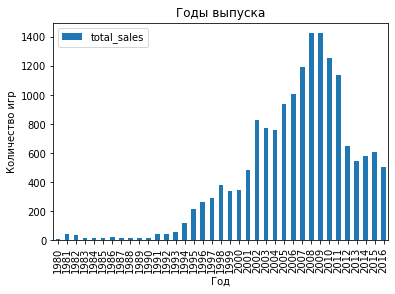

In [102]:
#data['year_of_release'].hist(bins = 25, range=(1980, 2016))
#plt.title('Годы выпуска')
#plt.xlabel('Год')
#plt.ylabel('Количество игр');
data.pivot_table(index='year_of_release', values='total_sales', aggfunc='count').plot(kind='bar')
plt.title('Годы выпуска')
plt.xlabel('Год')
plt.ylabel('Количество игр');

Продаж до 1993 года мало, поэтому рассмотрим продажи с 1993 по 2016гг

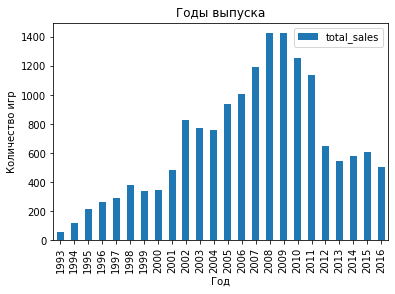

In [20]:
#data['year_of_release'].hist(bins = 25, range=(1993, 2016))
#plt.title('Годы выпуска')
#plt.xlabel('Год')
#plt.ylabel('Количество игр');
data.query('year_of_release <2017 & year_of_release >1992').pivot_table(index='year_of_release', values='total_sales', aggfunc='count').plot(kind='bar')
plt.title('Годы выпуска')
plt.xlabel('Год')
plt.ylabel('Количество игр');

Пик продаж приходится на 2008-2009годы

Посмотрим, как менялись продажи по платформам.

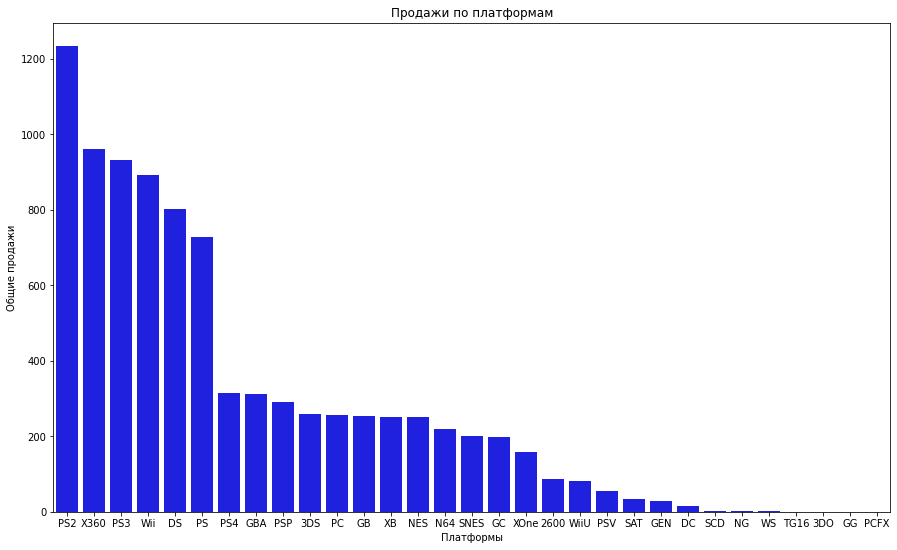

In [21]:
platform_sales = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)
plt.figure(figsize=(15, 9))
(sns.barplot(data = platform_sales, x = platform_sales.index, y = 'total_sales', color = 'blue')
    .set(title = 'Продажи по платформам', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()

Явными лидерами являются платформы PS2,X360,PS3,Wii,DS,PS. Рассмотрим их по годам.

In [22]:
data_platforms = data.pivot_table(index=['platform'],
                                       values= 'total_sales',
                                       aggfunc='sum') \
                          .sort_values(by='total_sales', ascending =False).reset_index()
data_platforms.head(6)

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58


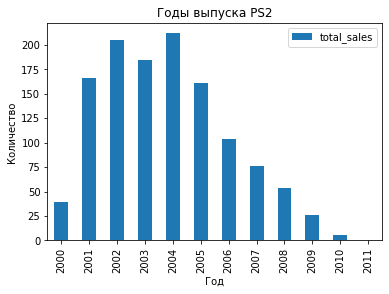

In [23]:
data.query("`platform` == 'PS2'").pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
plt.title('Годы выпуска PS2')
plt.xlabel('Год')
plt.ylabel('Количество');

Срок PS2 жизни 10 лет. Пик продаж на 5 год

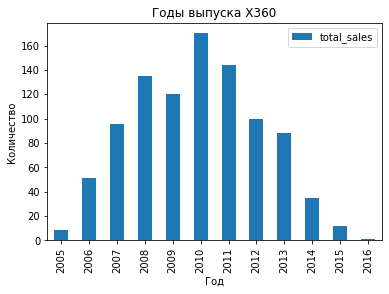

In [24]:
data.query("`platform` == 'X360'").pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
plt.title('Годы выпуска X360')
plt.xlabel('Год')
plt.ylabel('Количество');

Срок жизни X360 11 лет. Пик продаж на 6 год

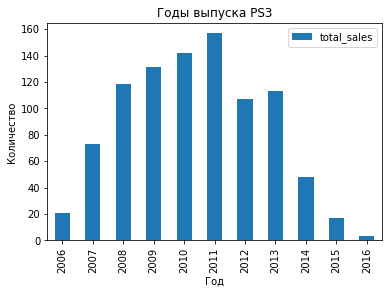

In [25]:
data.query("`platform` == 'PS3'").pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
plt.title('Годы выпуска PS3')
plt.xlabel('Год')
plt.ylabel('Количество');

Срок жизни X360 10 лет. Пик продаж на 6 год

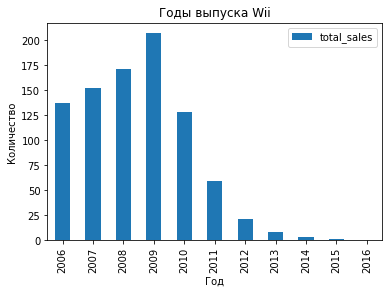

In [26]:
data.query("`platform` == 'Wii'").pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
plt.title('Годы выпуска Wii')
plt.xlabel('Год')
plt.ylabel('Количество');


Срок жизни Wii 10 лет. Пик продаж на 4 год

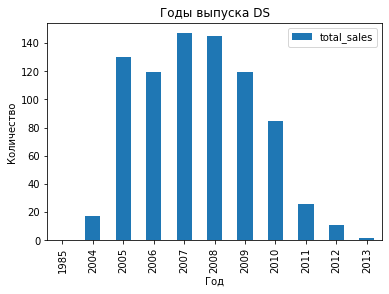

In [27]:
data.query("`platform` == 'DS'").pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
plt.title('Годы выпуска DS')
plt.xlabel('Год')
plt.ylabel('Количество');

Срок жизни DS 9 лет. Пик продаж на 4 год

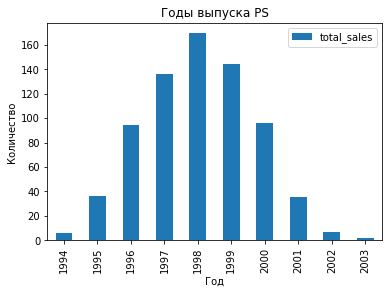

In [28]:
data.query("`platform` == 'PS'").pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
plt.title('Годы выпуска PS')
plt.xlabel('Год')
plt.ylabel('Количество');

Срок жизни DS 9 лет. Пик продаж на 5 год

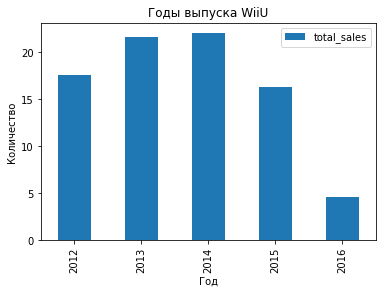

In [29]:
data.query("`platform` == 'WiiU'").pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
plt.title('Годы выпуска WiiU')
plt.xlabel('Год')
plt.ylabel('Количество');

Все платформы имеют срок продаж 9-10 лет, пик продаж у всех приходится на середину "жизни". 

Для построения прогноза на 2017 год предлагаю взять данные с 2014года.  Игровая индустрия быстро развивающаяся и прогрессирующая, требует постоянных новшеств и развития, т.к. технологии и запросы потребителя растут семимильными шагами. считаю, что более ранние данные не будут актуальны.

In [30]:
data_2014 = data.query('year_of_release >2013')

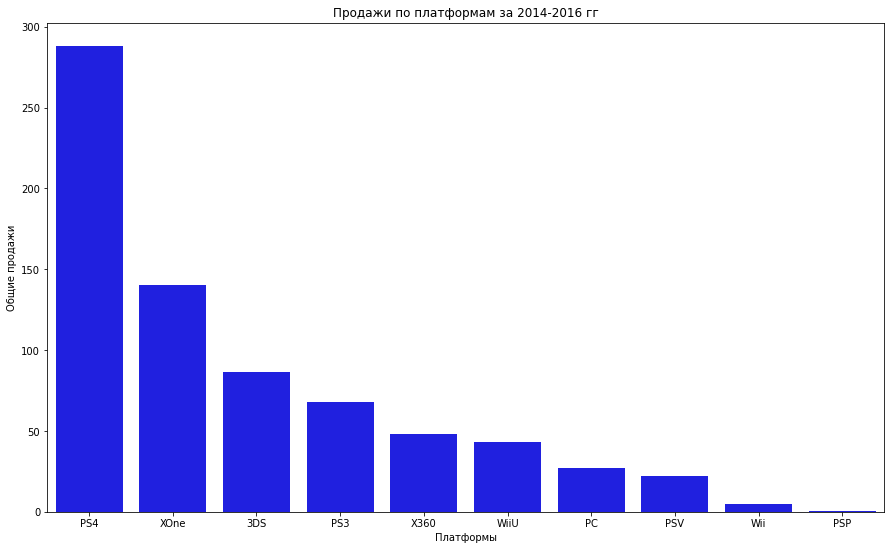

In [31]:
platform_2014 = (
    data_2014
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False)
)
plt.figure(figsize=(15, 9))
(sns.barplot(data = platform_2014, x = platform_2014.index, y = 'total_sales', color = 'blue')
    .set(title = 'Продажи по платформам за 2014-2016 гг', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()

Здесь явные лидеры PS4, XOne

Рассмотрим отдельно PS4,XOne,3DS и PS3(лидеры)

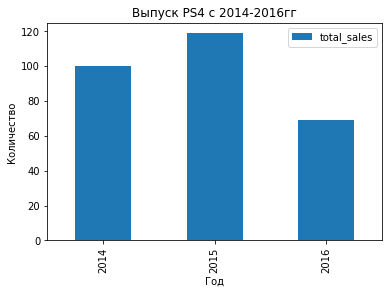

In [32]:
data_2014.query("`platform` == 'PS4'").pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
plt.title('Выпуск PS4 с 2014-2016гг')
plt.xlabel('Год')
plt.ylabel('Количество');

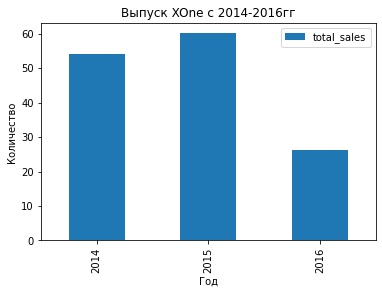

In [33]:
data_2014.query("`platform` == 'XOne'").pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
plt.title('Выпуск XOne с 2014-2016гг')
plt.xlabel('Год')
plt.ylabel('Количество');

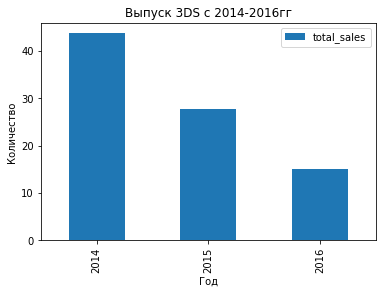

In [34]:
data_2014.query("`platform` == '3DS'").pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
plt.title('Выпуск 3DS с 2014-2016гг')
plt.xlabel('Год')
plt.ylabel('Количество');

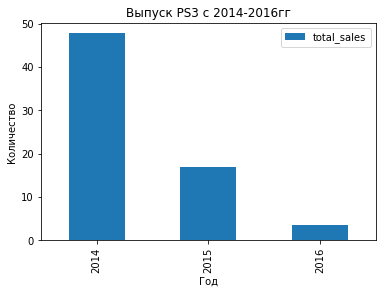

In [35]:
data_2014.query("`platform` == 'PS3'").pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
plt.title('Выпуск PS3 с 2014-2016гг')
plt.xlabel('Год')
plt.ylabel('Количество');

Продажи у всех платформ падают, особенно у PS3(возможно из-за выхода и роста продаж PS4)

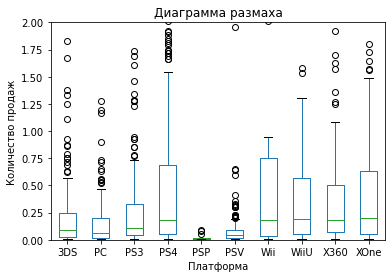

In [36]:
data_2014.pivot_table(index = 'name', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot(kind='box',ylim=(0,2));
plt.title('Диаграмма размаха')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж');

Здесь мы видим, что лидерами и перспективными платформами являются PS4,XOne и WiiU(Третий квартиль более или почти 1,5млн, и высокая медиана). Рассмотрим их по годам.

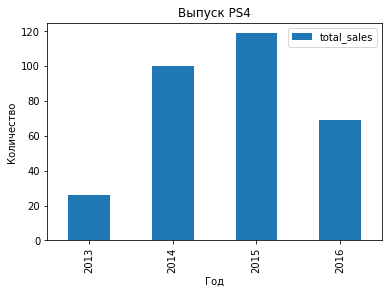

In [37]:
data.query("`platform` == 'PS4'").pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
plt.title('Выпуск PS4')
plt.xlabel('Год')
plt.ylabel('Количество');

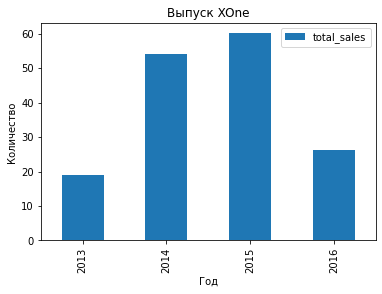

In [38]:
data.query("`platform` == 'XOne'").pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
plt.title('Выпуск XOne')
plt.xlabel('Год')
plt.ylabel('Количество');

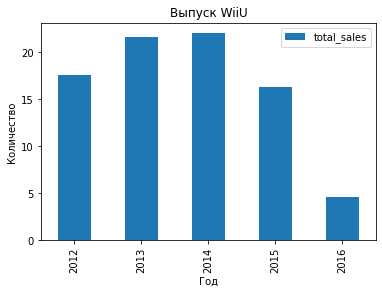

In [39]:
data.query("`platform` == 'WiiU'").pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
plt.title('Выпуск WiiU')
plt.xlabel('Год')
plt.ylabel('Количество');

Еще учитывая, что PS4, WiiU, XOne выходят с 2012-2013 годов(они "молодые"), считаю ихпотенциально прибыльными платформами.

Изучим зависимость на продажи внутри PS4 отзывы пользователей и критиков. 

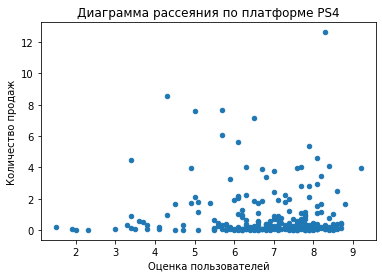

In [40]:
PS4 = data_2014.query('platform == "PS4"')
PS4.plot(x='user_score', y='total_sales', kind='scatter')
plt.title('Диаграмма рассеяния по платформе PS4')
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество продаж');

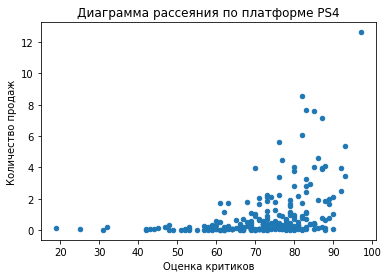

In [41]:
PS4 = data_2014.query('platform == "PS4"')
PS4.plot(x='critic_score', y='total_sales', kind='scatter')
plt.title('Диаграмма рассеяния по платформе PS4')
plt.xlabel('Оценка критиков')
plt.ylabel('Количество продаж');

In [42]:
PS4_cor = PS4[['critic_score','user_score', 'total_sales']]
PS4_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.546434,0.402661
user_score,0.546434,1.000000,-0.040132
total_sales,0.402661,-0.040132,1.000000


Зависимость продаж от отзывов не прослеживается.

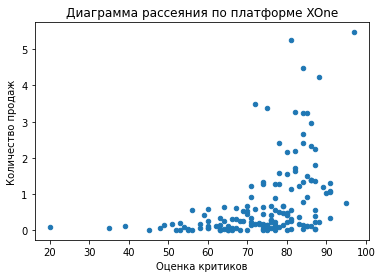

In [43]:
XOne = data_2014.query('platform == "XOne"')
XOne.plot(x='critic_score', y='total_sales', kind='scatter')
plt.title('Диаграмма рассеяния по платформе XOne')
plt.xlabel('Оценка критиков')
plt.ylabel('Количество продаж');

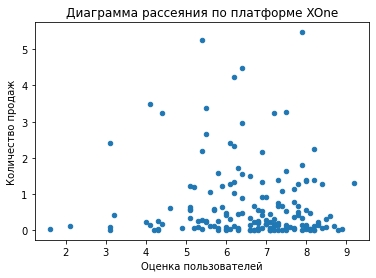

In [44]:
XOne = data_2014.query('platform == "XOne"')
XOne.plot(x='user_score', y='total_sales', kind='scatter')
plt.title('Диаграмма рассеяния по платформе XOne')
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество продаж');

In [45]:
XOne_cor = XOne[['critic_score','user_score', 'total_sales']]
XOne_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.440977,0.428677
user_score,0.440977,1.000000,-0.070384
total_sales,0.428677,-0.070384,1.000000


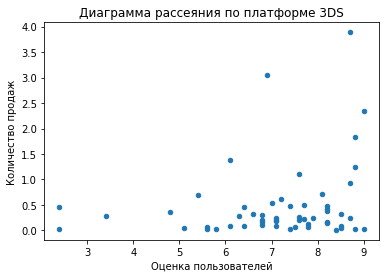

In [46]:
ds_3 = data_2014.query('platform == "3DS"')
ds_3.plot(x='user_score', y='total_sales', kind='scatter')
plt.title('Диаграмма рассеяния по платформе 3DS')
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество продаж');

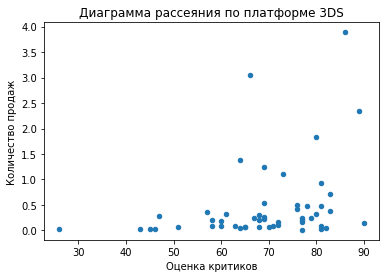

In [47]:
ds_3 = data_2014.query('platform == "3DS"')
ds_3.plot(x='critic_score', y='total_sales', kind='scatter')
plt.title('Диаграмма рассеяния по платформе 3DS')
plt.xlabel('Оценка критиков')
plt.ylabel('Количество продаж');

In [48]:
ds_3_cor = ds_3[['critic_score','user_score', 'total_sales']]
ds_3_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.862485,0.314117
user_score,0.862485,1.000000,0.215193
total_sales,0.314117,0.215193,1.000000


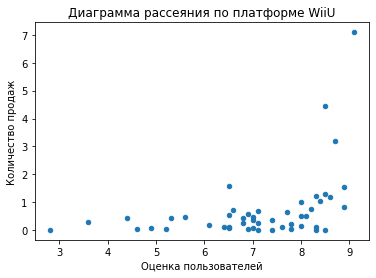

In [49]:
WiiU = data_2014.query('platform == "WiiU"')
WiiU.plot(x='user_score', y='total_sales', kind='scatter')
plt.title('Диаграмма рассеяния по платформе WiiU')
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество продаж');

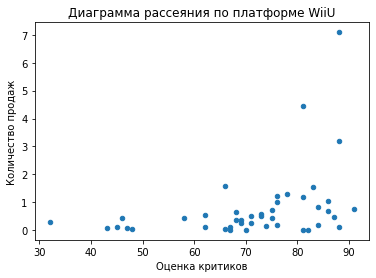

In [50]:
WiiU = data_2014.query('platform == "WiiU"')
WiiU.plot(x='critic_score', y='total_sales', kind='scatter')
plt.title('Диаграмма рассеяния по платформе WiiU')
plt.xlabel('Оценка критиков')
plt.ylabel('Количество продаж');

In [51]:
WiiU_cor = WiiU[['critic_score','user_score', 'total_sales']]
WiiU_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.763536,0.370201
user_score,0.763536,1.000000,0.407926
total_sales,0.370201,0.407926,1.000000



С другими платформами ситуация та же, связи продаж с отзывами нет.

In [52]:
print('PS4')
PS4_cor = PS4[['critic_score','user_score', 'total_sales']]
print(PS4_cor.corr())
print('')
print('XOne')
XOne_cor = XOne[['critic_score','user_score', 'total_sales']]
print(XOne_cor.corr())
print('')
print('DS3')
ds_3_cor = ds_3[['critic_score','user_score', 'total_sales']]
print(ds_3_cor.corr())
print('')
print('WiiU')
WiiU_cor = WiiU[['critic_score','user_score', 'total_sales']]
print(WiiU_cor.corr())

PS4
              critic_score  user_score  total_sales
critic_score      1.000000    0.546434     0.402661
user_score        0.546434    1.000000    -0.040132
total_sales       0.402661   -0.040132     1.000000

XOne
              critic_score  user_score  total_sales
critic_score      1.000000    0.440977     0.428677
user_score        0.440977    1.000000    -0.070384
total_sales       0.428677   -0.070384     1.000000

DS3
              critic_score  user_score  total_sales
critic_score      1.000000    0.862485     0.314117
user_score        0.862485    1.000000     0.215193
total_sales       0.314117    0.215193     1.000000

WiiU
              critic_score  user_score  total_sales
critic_score      1.000000    0.763536     0.370201
user_score        0.763536    1.000000     0.407926
total_sales       0.370201    0.407926     1.000000


 Судя по корреляции, зависимость продаж от оценки критиков больше, чем от оценки пользователей. Это логично, у критиков - это работа, они дают оценку по определенным критериям(список) и делают это более объективно. Пользователи же дают оценку на впечатлениях(хорошая оценка, если понравилась, плохая, если не понравилась). Учитывая, что вкусы у всех разные, то оценка является менее объективной. 

Посмотрим на общее распределение игр по жанрам

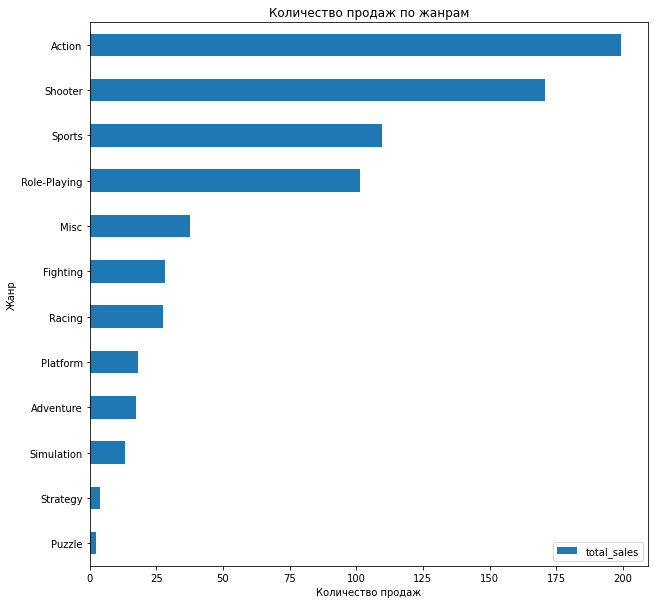

In [53]:
data_2014.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').sort_values(ascending=True, by = 'total_sales').plot(kind='barh', figsize=(10,10), y= 'total_sales')
plt.title('Количество продаж по жанрам')
plt.xlabel('Количество продаж')
plt.ylabel('Жанр');

In [54]:
data_2014.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'total_sales')


,total_sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


In [55]:
data_2014.groupby('genre')['total_sales'].mean()

genre
Action          0.322068
Adventure       0.094865
Fighting        0.470333
Misc            0.332301
Platform        0.476053
Puzzle          0.157857
Racing          0.398841
Role-Playing    0.459005
Shooter         1.335469
Simulation      0.298409
Sports          0.680000
Strategy        0.107027
Name: total_sales, dtype: float64

In [56]:
data_2014.groupby('genre')['total_sales'].median()

genre
Action          0.090
Adventure       0.030
Fighting        0.125
Misc            0.090
Platform        0.140
Puzzle          0.045
Racing          0.090
Role-Playing    0.110
Shooter         0.515
Simulation      0.100
Sports          0.180
Strategy        0.060
Name: total_sales, dtype: float64

 Изучив среднее арифметическое и медиану, было выявлено, что самые продаваемые жанры - это Shooter, Platform, Fighting, Sports,Role-Playing. А самые низкие продажи у жанров Adventure,Strategy и Puzzle  

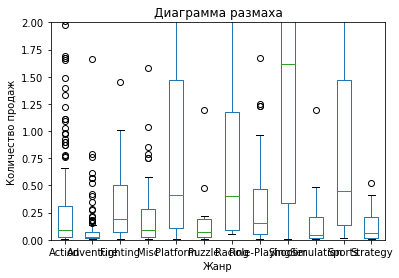

In [94]:
data_2014.pivot_table(index = 'name', columns = 'genre', values = 'total_sales', aggfunc = 'sum').plot(kind='box',ylim=(0,2));
plt.title('Диаграмма размаха')
plt.xlabel('Жанр')
plt.ylabel('Количество продаж');

**Шаг 4. Составьте портрет пользователя каждого региона**

Возьмем Северную Америку.

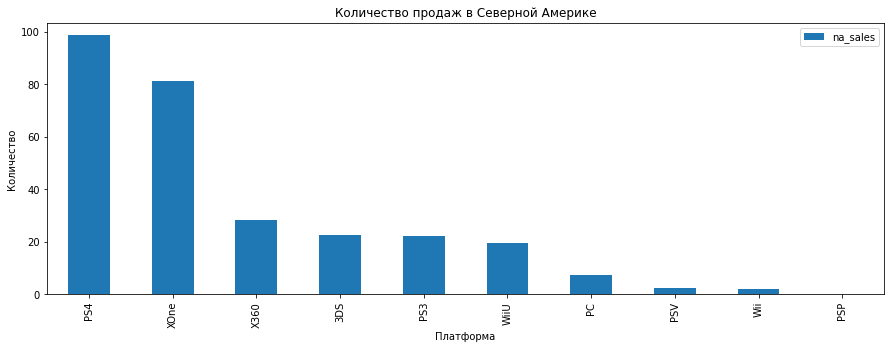

In [59]:
data_2014.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').plot(kind = 'bar', figsize=(15,5))
plt.title('Количество продаж в Северной Америке')
plt.xlabel('Платформа')
plt.ylabel('Количество');

In [60]:
data_2014.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').head()


,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


In [61]:
na_platform = data_2014.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales')
print(na_platform)

          na_sales
platform          
PS4          98.61
XOne         81.27
X360         28.30
3DS          22.64
PS3          22.05
WiiU         19.36
PC            7.23
PSV           2.52
Wii           2.08
PSP           0.00


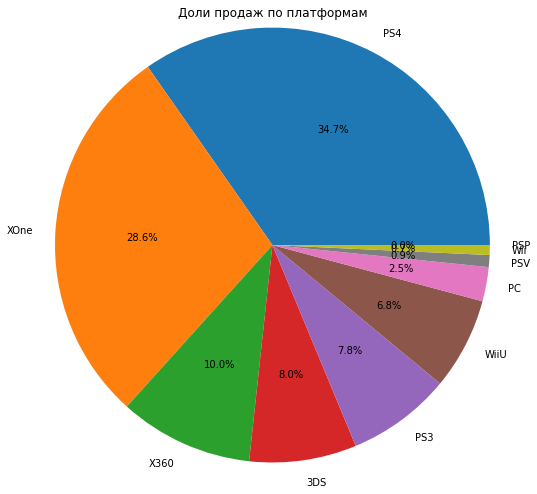

In [62]:
plt.pie(na_platform['na_sales'], labels = na_platform.index,  autopct = '%.1f%%', radius = 2.5)
plt.title('Доли продаж по платформам',pad=120)
plt.show()


Самые продаваемые здесь платформы PS4, XOne, X360, 3DS, PS3

Рассмотрим Европейский рынок

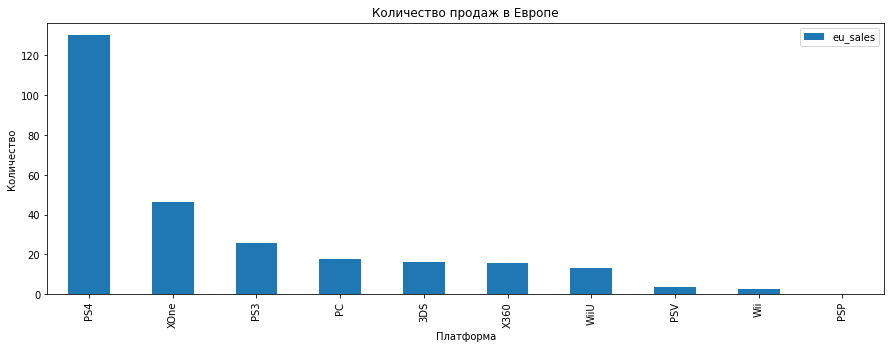

In [63]:
data_2014.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').plot(kind = 'bar', figsize=(15,5))
plt.title('Количество продаж в Европе')
plt.xlabel('Платформа')
plt.ylabel('Количество');

In [64]:
data_2014.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').head(6)


,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12
X360,15.49


In [65]:
eu_platform = data_2014.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales')
print(eu_platform)

          eu_sales
platform          
PS4         130.04
XOne         46.25
PS3          25.54
PC           17.97
3DS          16.12
X360         15.49
WiiU         13.15
PSV           3.53
Wii           2.59
PSP           0.00


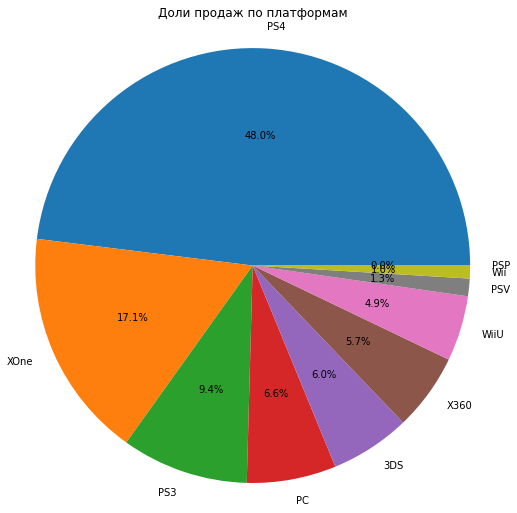

In [66]:
plt.pie(eu_platform['eu_sales'], labels = eu_platform.index,  autopct = '%.1f%%', radius = 2.5)
plt.title('Доли продаж по платформам',pad=140)
plt.show()

Здесь также лидерами являются PS4, XOne, PS3, 3DS, X360( PC не брала в расчет, т.к. рассматриваем платформы).

Рассмотрим японский рынок

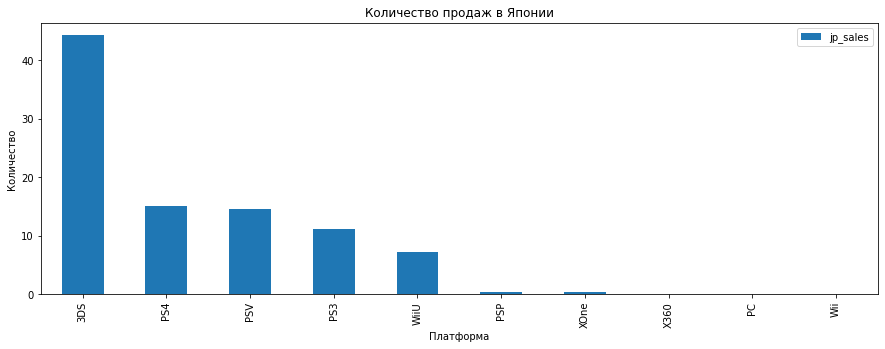

In [67]:
data_2014.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').plot(kind = 'bar', figsize=(15,5))
plt.title('Количество продаж в Японии')
plt.xlabel('Платформа')
plt.ylabel('Количество');

In [68]:
data_2014.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').head()


,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


In [69]:
jp_platform = data_2014.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales')
print(jp_platform)

          jp_sales
platform          
3DS          44.24
PS4          15.02
PSV          14.54
PS3          11.22
WiiU          7.31
PSP           0.36
XOne          0.32
X360          0.08
PC            0.00
Wii           0.00


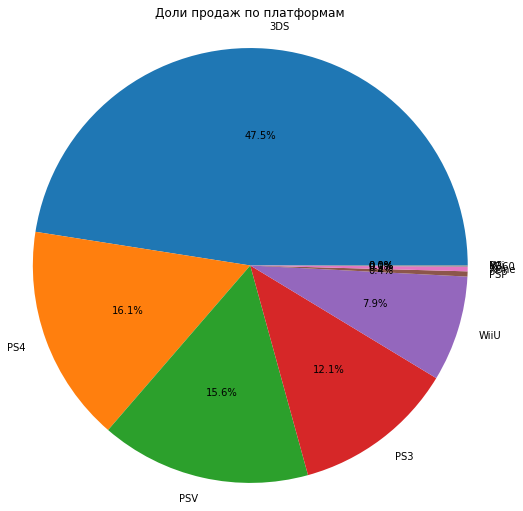

In [70]:
plt.pie(jp_platform['jp_sales'], labels = jp_platform.index,  autopct = '%.1f%%', radius = 2.5)
plt.title('Доли продаж по платформам',pad=140)
plt.show()

У японцев лидеры 3DS, PS4, PSV, PS3 и WiiU. Остальные платформы занимают менее 1%.

Японцы- патриоты, играют в японские игры, а вот американцы и европейцы предпочитают кроме японских,еще и американские платформы.

Рассмотрим самые популярные жанры 

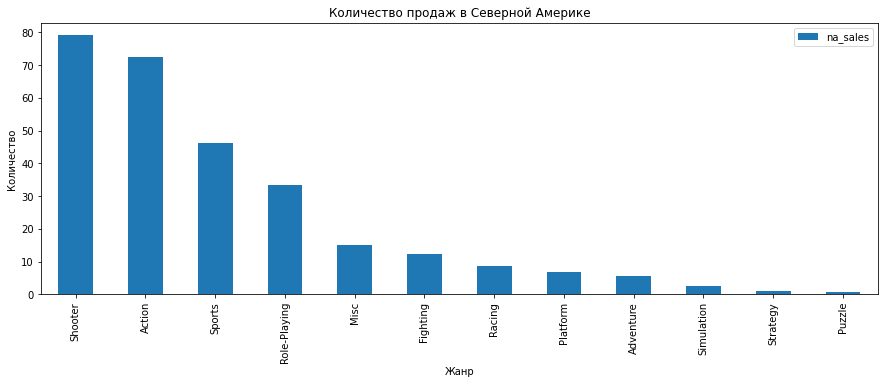

In [71]:
data_2014.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').plot(kind = 'bar', figsize=(15,5))
plt.title('Количество продаж в Северной Америке')
plt.xlabel('Жанр')
plt.ylabel('Количество');

In [72]:
data_2014.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').head()

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


Американцы любят жанры Shooter, Action, Sports, Role-Playing и Misc.

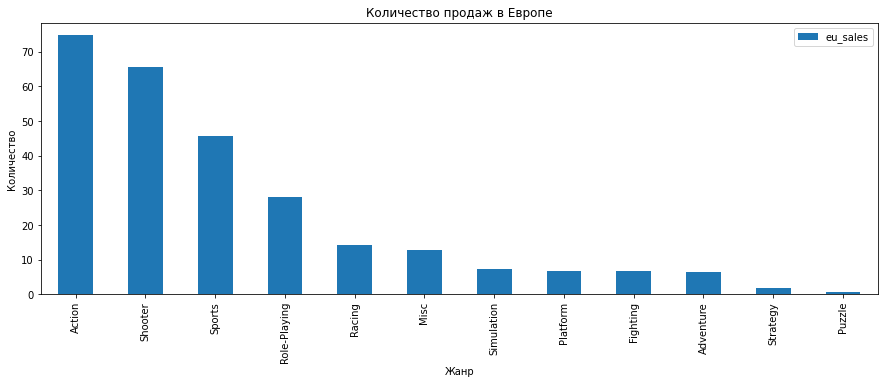

In [73]:
data_2014.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').plot(kind = 'bar', figsize=(15,5))
plt.title('Количество продаж в Европе')
plt.xlabel('Жанр')
plt.ylabel('Количество');

In [74]:
data_2014.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').head()

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


Европейцы любят жанры Action, Shooter,  Sports, Role-Playing и Racing. ОЧень схожий рейтинг с американцами.

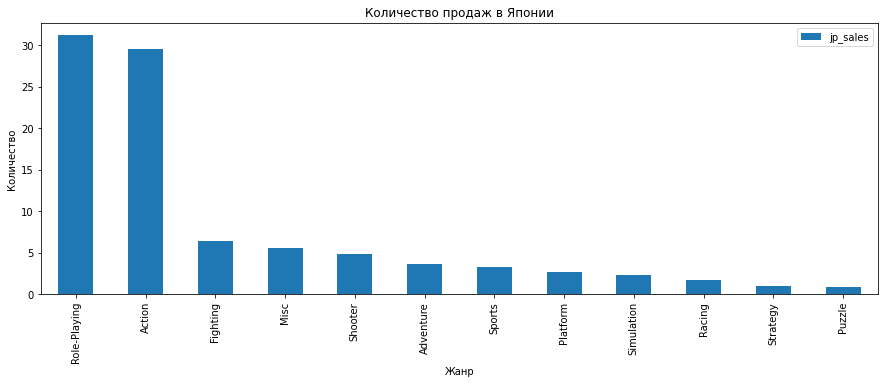

In [75]:
data_2014.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').plot(kind = 'bar', figsize=(15,5))
plt.title('Количество продаж в Японии')
plt.xlabel('Жанр')
plt.ylabel('Количество');

In [76]:
data_2014.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').head()

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


А вот японцы предпочитают Role-Playing. У японцев дефицит общения в жизни, возможно, играми  они компенсируют его. Также лидеры - это Action, Fighting, Misc, Shooter

Посмортим влияет ли рейтинг ESRB на продажи

In [77]:
data_2014.pivot_table(index = 'rating', values = ['jp_sales','na_sales','eu_sales'], aggfunc = 'sum')

,eu_sales,jp_sales,na_sales
rating,,,
E,58.06,8.94,50.74
E10+,26.16,4.46,33.23
M,93.44,8.01,96.42
T,34.07,14.78,38.95
unknown,58.95,56.90,64.72


«E» («Everyone») — «Для всех» 

«E10+»(«Everyone 10 and older») — «Для всех от 10 лет и старше»

«T» («Teen») — «Подросткам»

«M»(«Mature») — «Для взрослых»


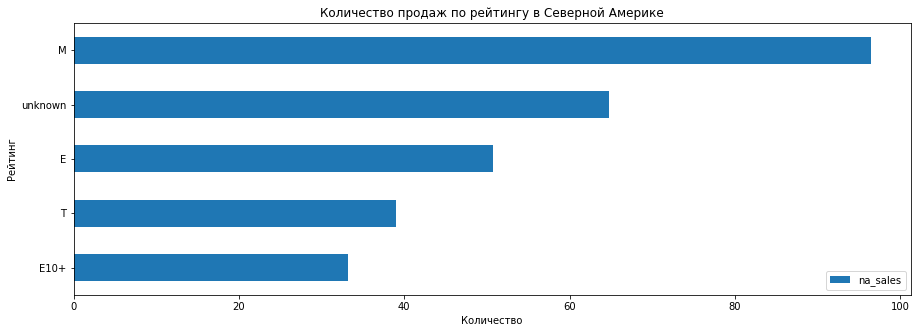

In [78]:
data_2014.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=True, by = 'na_sales').plot(kind = 'barh', figsize=(15,5))
plt.title('Количество продаж по рейтингу в Северной Америке')
plt.ylabel('Рейтинг')
plt.xlabel('Количество');

В Америке больше людей пользуются играми для взрослых.

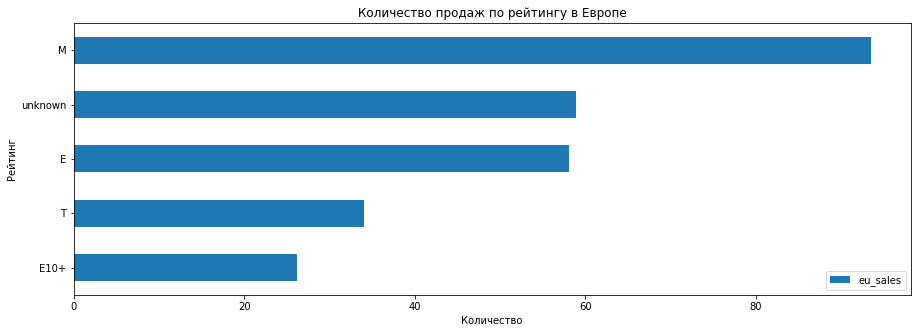

In [79]:
data_2014.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=True, by = 'eu_sales').plot(kind = 'barh', figsize=(15,5))
plt.title('Количество продаж по рейтингу в Европе')
plt.ylabel('Рейтинг')
plt.xlabel('Количество');

В Европе также больше играют в игры для взрослых.

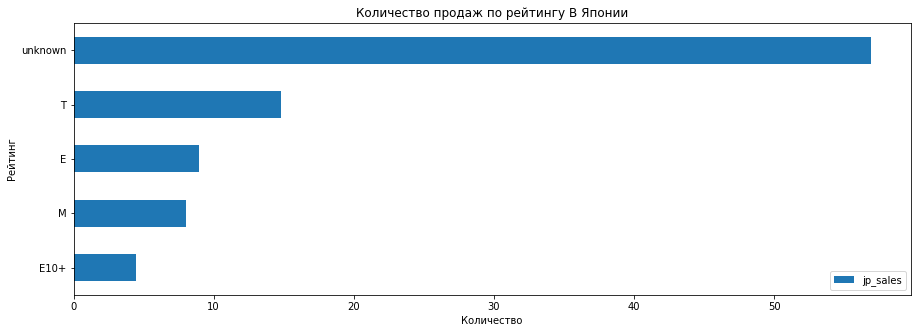

In [80]:
data_2014.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=True, by = 'jp_sales').plot(kind = 'barh', figsize=(15,5))
plt.title('Количество продаж по рейтингу В Японии')
plt.ylabel('Рейтинг')
plt.xlabel('Количество');

В Японии больше играют подростки. Вохможно, взрослые японцы много работают и у них нет времени на игры.

 Нашла в интернете: Entertainment Software Rating Board (ESRB) — это саморегулируемая организация, которая присваивает возрастные и контентные рейтинги потребительским видеоиграм в США и Канаде.
    
Скорее всего причина в том, что ESRB -это рейтинг Северной Америки, у Японии скорее всего свои организации, определяющие рейтинги.




 В целом портрет среднего американского пользователя и европейского схож. Они играют в американские и японские игры(PS4, XOne, PS3, 3DS, X360), любят жанры Shooter, Action, Sports, Role-Playing и Misc. В большинстве случаев выбраны игры для взрослых. А вот японский потребитель сильно отличается. Японцы - патриоты, играют в основном в японские игры(3DS, PS4, PSV, PS3 и WiiU). Лидирующие жанры Role-Playing, Action, Fighting, Misc, Shooter. Японцы играют в основном в игры категории "для подростков". Мы видим отличия американского и европейского(западного) рынка от японского(восточного). Разный менталитет, приоритеты, ценности и т.д. сказываются на продажах. 

**Шаг 5. Проверьте гипотезы**

Для проверки гипотез будем использовать двусторонний t-тест Стьюдента, т.к. наши выборки не связаны между собой и установим уровень значимости 0,05.


Гипотеза 1

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1: Средние пользовательские рейтинги платформ Xbox One и PC разные

In [81]:
x_one = data_2014[data_2014['platform']=="XOne"]['user_score'].dropna()
pc = data_2014[data_2014['platform']=="PC"]['user_score'].dropna()

In [82]:
print("x_one среднее значение:", x_one.mean())
print("pc среднее значение:", pc.mean())
alpha = 0.05 
results_1 = st.ttest_ind(
    x_one, 
    pc,
    equal_var = False)
print('p-value:', results_1.pvalue)

if (results_1.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

x_one среднее значение: 6.594545454545456
pc среднее значение: 6.298360655737705
p-value: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Полученное p-value выше выбранного уровня статистической значимости (0.05). Значит у нас нет оснований для отклонения нулевой гипотезы, и мы не можем утверждать, что средние пользовательские рейтинги платформ XOne и PC различаются.

Гипотеза 2

Н0 - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.
Н1-средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [83]:
action = data_2014[data_2014['genre']=="Action"]['user_score'].dropna()
sports = data_2014[data_2014['genre']=="Sports"]['user_score'].dropna()



In [84]:
print("action среднее значение:", action.mean())
print("sports среднее значение:", sports.mean())

alpha = 0.05 
results_2 = st.ttest_ind(
    action, 
    sports,
    equal_var = False)

print( results_2.pvalue)

if (results_2.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

action среднее значение: 6.760606060606061
sports среднее значение: 5.2251968503937
1.1825550382644557e-14
Отвергаем нулевую гипотезу


Полученное p-value ниже выбранного уровня статистической значимости (0.05). Значит у нас есть основания для отклонения нулевой гипотезы, и мы не можем утверждать, что средние пользовательские рейтинги жанров  Action и Sport одинаковые.

**Вывод**

Была произведена подготовка данных:

- замена названия столбцов (приведены к нижнему регистру); 

- преобразованы данные в нужные типы. 

- описаны, в каких столбцах заменил тип данных

- обработаны пропуски; 

- аббревиатуру 'tbd' в столбце с оценкой пользователей заменили на Nan

- разобраны значения рейтингов и обработаны;

- посчитаны суммарные продажи во всех регионах и записаны в отдельный столбец.


Проведен исследовательский анализ данных:

- Рассмотрено сколько игр выпускалось в разные годы. Взят период с 1980 по 2016годы, до 1993 года было выпущено очень мало игр, активный рост начался с 2003 года с пиком в 2008-2009гг и после пошел спад.

- рассмотрено, как менялись продажи по платформам. Явными лидерами являются платформы PS2,X360,PS3,Wii,DS,PS.Рассмотрели их по годам. Все платформы имеют срок продаж 9-10 лет, пик продаж у всех приходится на середину "жизни".(4-5 лет)

- Для построения прогноза на 2017 год были взяты данные с 2014года.Игровая индустрия быстро развивающаяся и прогрессирующая, требует постоянных новшеств и развития, т.к. технологии и запросы потребителя растут  стремительно. Считаю, что более ранние данные не будут актуальны.

- явные лидеры продаж за актуальный период -PS4, XOne. Продажи у всех платформ падают, особенно у PS3(возможно из-за выхода и роста продаж PS4).

- построив boxplot, мы видим, что лидерами продаж  являются PS4,XOne и WiiU(Третий квартиль более или почти 1,5млн, и высокая значение медианы). Еще учитывая, что они выходят с 2012-2013 годов( "молодые"), считаю их потенциально прибыльными платформами.

- Изучена зависимость на продажи отзывы пользователей и критиков. И выяснили, что связь небольшая. зависимость продаж от оценки критиков немного больше, чем от оценки пользователей. Критики дают оценку по определенным критериям(список) и делают это более объективно. Пользователи же дают оценку на впечатлениях(понравилось- не понравилось). Учитывая, что вкусы у всех разные, то оценка является менее объективной.

- изучено общее распределение игр по жанрам.Самые популярные и продаваемые жанры - Shooter, Platform, Fighting, Sports,Role-Playing. Самые низкие продажи у жанров Adventure, Puzzle и Strategy.

Составлен портрет пользователя каждого региона

- в Северной Америке самые продаваемые платформы PS4, XOne, X360, 3DS, PS3(американские и японские). Они любят жанры Shooter, Action, Sports, Role-Playing и Misc. Чаще играют в игры категории для взрослых.

- в Европе лидерами являются PS4, XOne, PS3, 3DS, X360(американские и японские) и самые популярные жанры -Action, Shooter, Sports, Role-Playing и Racing. Также чаще играют в игры категории для взрослых.

- портрет американцев и европейцев очень похож, видимо связан со схожим менталитетом.

- а вот портрет японцев отличается. Они патриоты. У них лидеры по платформам 3DS, PS4, PSV, PS3 и WiiU(японские) и самый популярный жанр Role-Playing. У японцев дефицит общения в жизни, возможно, играми они компенсируют его. Также лидеры - это Action, Fighting, Misc, Shooter. И играют больше подростки, нежели взрослые.

- Мы видим отличия американского и европейского(западного) рынка от японского(восточного). Разный менталитет, приоритеты, ценности и т.д. сказываются на продажах.

Проверили гипотезы и сделали выводы

- Мы не можем утверждать, что средние пользовательские рейтинги платформ XOne и PC различаются.

- мы не можем утверждать, что средние пользовательские рейтинги жанров  Action и Sport одинаковые.




